### Linear Regression Task
- 각 광고 종목에 투자했을 때, 수익이 얼마나 발생하는지 회귀 예측 진행

In [2]:
import pandas as pd

a_df = pd.read_csv('./datasets/advertising.csv')
a_df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [3]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# 맨 처름 feature 제외 나머지 가져오기
pre_a_df = a_df.iloc[:, 1:]

pre_a_df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [8]:
pre_a_df.corr()['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

#### 중간 분석
- 광고 수익에 가장 많은 영향을 주는 것은 TV 광고
- 라디오, 신문 광고는 다수의 이상치가 존재하여, 일반화하기 어려움
- 각각을 타겟과 회귀 예측

### 🖥️ TV

In [10]:
tv_cols = ['TV', 'Sales']

tv_a_df = pre_a_df[tv_cols]

tv_a_df

TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]

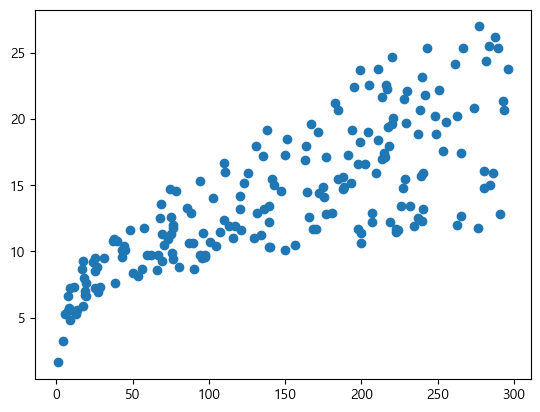

In [68]:
import matplotlib.pyplot as plt

# TV 광고 투자와 판매량의 관계를 산점도로 시각화
plt.scatter(tv_a_df['TV'], tv_a_df['Sales'])
plt.show()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

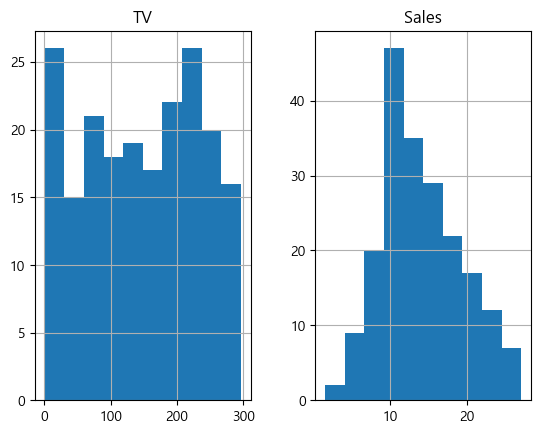

In [69]:
# 각 데이터의 분포를 히스토그램으로 시각화
tv_a_df.hist()

In [22]:
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# 시드 값 고정
torch.manual_seed(124)

# feature와 target으로 데이터 세트 분리
features, targets = tv_a_df.iloc[:, :-1], tv_a_df.iloc[:, -1]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

In [23]:
# 회귀 분석 이전, 분리한 데이터들의 value만 가져와 tensor 타입으로 재가공
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

# y(정답)의 경우, 마지막 컬럼 하나만 가져와서 현재 1차원 ndarray 형태
# reshape로 X(문제)와 같은 2차원(데이터 수 * 1열) tensor 타입으로 변환
y_train = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [26]:
# 데이터 재가공 확인
print('(x, y)')
for x, y in zip(X_train, y_train):
    print(x, y)

(x, y)
tensor([17.2000]) tensor([5.9000])
tensor([250.9000]) tensor([22.2000])
tensor([289.7000]) tensor([25.4000])
tensor([228.3000]) tensor([15.5000])
tensor([283.6000]) tensor([25.5000])
tensor([62.3000]) tensor([9.7000])
tensor([156.6000]) tensor([10.5000])
tensor([228.]) tensor([21.5000])
tensor([191.1000]) tensor([17.3000])
tensor([27.5000]) tensor([6.9000])
tensor([219.8000]) tensor([19.6000])
tensor([170.2000]) tensor([11.7000])
tensor([163.5000]) tensor([18.])
tensor([36.9000]) tensor([10.8000])
tensor([265.6000]) tensor([17.4000])
tensor([290.7000]) tensor([12.8000])
tensor([168.4000]) tensor([11.7000])
tensor([38.2000]) tensor([7.6000])
tensor([57.5000]) tensor([11.8000])
tensor([217.7000]) tensor([19.4000])
tensor([50.]) tensor([8.4000])
tensor([199.8000]) tensor([10.6000])
tensor([96.2000]) tensor([11.4000])
tensor([43.]) tensor([9.6000])
tensor([229.5000]) tensor([19.7000])
tensor([239.9000]) tensor([23.2000])
tensor([75.5000]) tensor([9.9000])
tensor([97.2000]) tensor([9

#### W, b, Loss Function을 직접 설정하는 경우 

In [57]:
# 선형 회귀 모델 선언
l_r = Linear(1, 1)

# 가중치 초기화
W = torch.zeros(1, requires_grad=True)

# 편향 초기화
b = torch.zeros(1, requires_grad=True)

# 경사 하강법
optimizer = SGD([W, b], lr=1e-5)

# 반복 횟수 설정
epochs = 2000000

# 설정한 횟수만큼 반복
for epoch in range(1, epochs + 1):
    # 새로운 가설 수립
    H = W * X_train + b

    # 가설에 따른 loss 계산
    loss = mse_loss(H, y_train)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W.item(), b.item(), loss.item()))

 100/2000000: W: 0.0832, b: 0.0037, loss: 22.7164
 200/2000000: W: 0.0832, b: 0.0070, loss: 22.7055
 300/2000000: W: 0.0832, b: 0.0104, loss: 22.6945
 400/2000000: W: 0.0832, b: 0.0137, loss: 22.6836
 500/2000000: W: 0.0832, b: 0.0170, loss: 22.6726
 600/2000000: W: 0.0832, b: 0.0203, loss: 22.6617
 700/2000000: W: 0.0831, b: 0.0236, loss: 22.6508
 800/2000000: W: 0.0831, b: 0.0269, loss: 22.6399
 900/2000000: W: 0.0831, b: 0.0302, loss: 22.6290
1000/2000000: W: 0.0831, b: 0.0335, loss: 22.6181
1100/2000000: W: 0.0831, b: 0.0368, loss: 22.6072
1200/2000000: W: 0.0831, b: 0.0401, loss: 22.5964
1300/2000000: W: 0.0830, b: 0.0434, loss: 22.5855
1400/2000000: W: 0.0830, b: 0.0467, loss: 22.5747
1500/2000000: W: 0.0830, b: 0.0500, loss: 22.5638
1600/2000000: W: 0.0830, b: 0.0532, loss: 22.5530
1700/2000000: W: 0.0830, b: 0.0565, loss: 22.5422
1800/2000000: W: 0.0830, b: 0.0598, loss: 22.5314
1900/2000000: W: 0.0829, b: 0.0631, loss: 22.5206
2000/2000000: W: 0.0829, b: 0.0664, loss: 22.5098


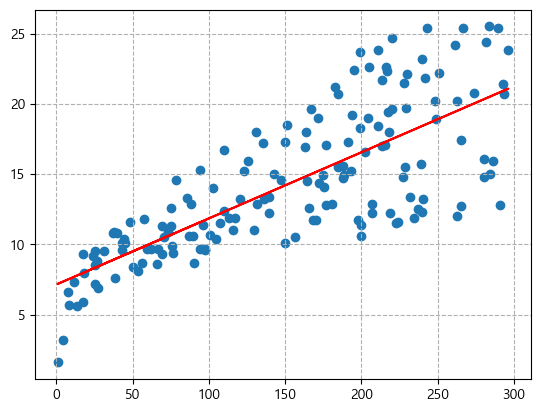

In [58]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.047 * X_train + 7.1502, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [61]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.047 * X_test + 7.1502

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

3.0652761527236096


#### TV 광고 회귀 예측 결과
- TV 광고에 투자한 금액 * 0.047 + 7.1502만큼 광고 수익이 창출될 것으로 예측
- 오차는 약 3.0652

#### LinearRegressionModel 클래스 사용

In [63]:
from torch.nn import Module, Linear

# LinearRegressionModel 클래스 선언
class LinearRegressionModel(Module):
    # 클래스 실행 시
    def __init__(self):
        # 부모 클래스(torch.nn.Module) 실행
        super().__init__()
        # linear 재정의
        self.linear = Linear(1, 1)

    # LinearRegressionModel.forward 사용 시
    def forward(self, x):
        # 위에서 재정의한 linear에 전달받은 x값 넣어서 실행
        return self.linear(x)

In [64]:
# LinearRegressionModel 생성자 호출
l_r = LinearRegressionModel()
# 1e-10 = 0.0000000001 (소수점 10자리)
optimizer = SGD(l_r.parameters(), lr=1e-5)

epochs = 1047300

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

 100/1047300: W: 0.0847, b: -0.2769, loss: 23.6642
 200/1047300: W: 0.0846, b: -0.2735, loss: 23.6523
 300/1047300: W: 0.0846, b: -0.2701, loss: 23.6405
 400/1047300: W: 0.0846, b: -0.2666, loss: 23.6287
 500/1047300: W: 0.0846, b: -0.2632, loss: 23.6169
 600/1047300: W: 0.0846, b: -0.2598, loss: 23.6051
 700/1047300: W: 0.0846, b: -0.2563, loss: 23.5933
 800/1047300: W: 0.0845, b: -0.2529, loss: 23.5816
 900/1047300: W: 0.0845, b: -0.2495, loss: 23.5698
1000/1047300: W: 0.0845, b: -0.2460, loss: 23.5580
1100/1047300: W: 0.0845, b: -0.2426, loss: 23.5463
1200/1047300: W: 0.0845, b: -0.2392, loss: 23.5346
1300/1047300: W: 0.0844, b: -0.2358, loss: 23.5229
1400/1047300: W: 0.0844, b: -0.2323, loss: 23.5111
1500/1047300: W: 0.0844, b: -0.2289, loss: 23.4995
1600/1047300: W: 0.0844, b: -0.2255, loss: 23.4878
1700/1047300: W: 0.0844, b: -0.2221, loss: 23.4761
1800/1047300: W: 0.0844, b: -0.2187, loss: 23.4644
1900/1047300: W: 0.0843, b: -0.2153, loss: 23.4528
2000/1047300: W: 0.0843, b: -0.

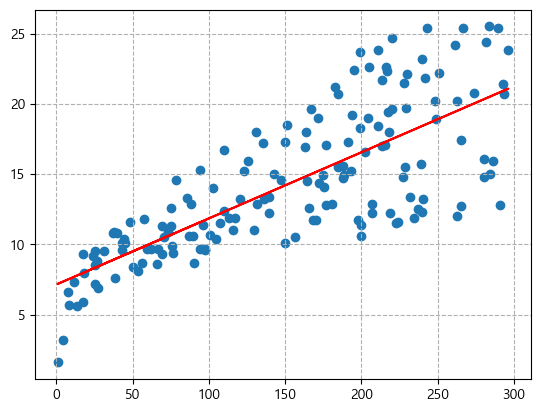

In [65]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.047 * X_train + 7.1502, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [66]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.047 * X_test + 7.1502

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

3.0652761527236096


### 📻 라디오 

In [67]:
radio_cols = ['Radio', 'Sales']
rd_a_df = pre_a_df[radio_cols]

rd_a_df

Radio  Sales
0     37.8   22.1
1     39.3   10.4
2     45.9    9.3
3     41.3   18.5
4     10.8   12.9
..     ...    ...
195    3.7    7.6
196    4.9    9.7
197    9.3   12.8
198   42.0   25.5
199    8.6   13.4

[200 rows x 2 columns]

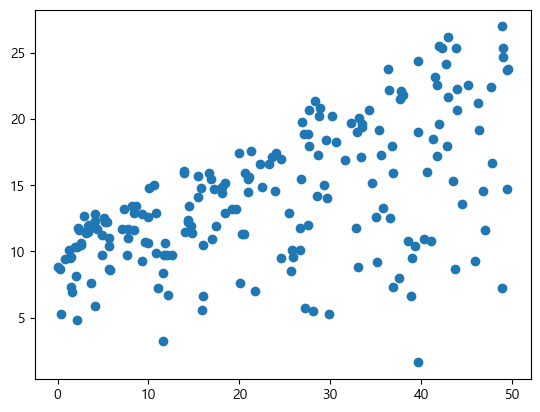

In [70]:
import matplotlib.pyplot as plt

# 라디오 광고 투자와 판매량의 관계를 산점도로 시각화
plt.scatter(rd_a_df['Radio'], rd_a_df['Sales'])
plt.show()

array([[<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

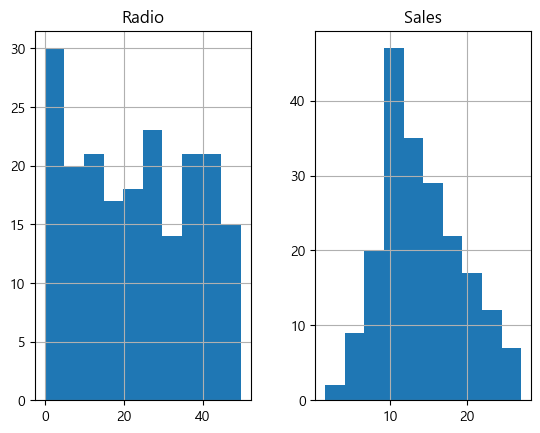

In [71]:
# 각 데이터의 분포를 히스토그램으로 시각화
rd_a_df.hist()

In [72]:
# 회귀 분석 이전, 분리한 데이터들의 value만 가져와 tensor 타입으로 재가공
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

# y(정답)의 경우, 마지막 컬럼 하나만 가져와서 현재 1차원 ndarray 형태
# reshape로 X(문제)와 같은 2차원(데이터 수 * 1열) tensor 타입으로 변환
y_train = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [73]:
# 데이터 재가공 확인
print('(x, y)')
for x, y in zip(X_train, y_train):
    print(x, y)

(x, y)
tensor([4.1000]) tensor([5.9000])
tensor([36.5000]) tensor([22.2000])
tensor([42.3000]) tensor([25.4000])
tensor([16.9000]) tensor([15.5000])
tensor([42.]) tensor([25.5000])
tensor([12.6000]) tensor([9.7000])
tensor([2.6000]) tensor([10.5000])
tensor([37.7000]) tensor([21.5000])
tensor([28.7000]) tensor([17.3000])
tensor([1.6000]) tensor([6.9000])
tensor([33.5000]) tensor([19.6000])
tensor([7.8000]) tensor([11.7000])
tensor([36.8000]) tensor([18.])
tensor([38.6000]) tensor([10.8000])
tensor([20.]) tensor([17.4000])
tensor([4.1000]) tensor([12.8000])
tensor([7.1000]) tensor([11.7000])
tensor([3.7000]) tensor([7.6000])
tensor([32.8000]) tensor([11.8000])
tensor([33.5000]) tensor([19.4000])
tensor([11.6000]) tensor([8.4000])
tensor([2.6000]) tensor([10.6000])
tensor([14.8000]) tensor([11.4000])
tensor([25.9000]) tensor([9.6000])
tensor([32.3000]) tensor([19.7000])
tensor([41.5000]) tensor([23.2000])
tensor([10.8000]) tensor([9.9000])
tensor([1.5000]) tensor([9.6000])
tensor([11.600

#### W, b, Loss Function을 직접 설정하는 경우

In [75]:
# 선형 회귀 모델 선언
l_r = Linear(1, 1)

# 가중치 초기화
W = torch.zeros(1, requires_grad=True)

# 편향 초기화
b = torch.zeros(1, requires_grad=True)

# 경사 하강법
optimizer = SGD([W, b], lr=1e-5)

# 반복 횟수 설정
epochs = 1500000

# 설정한 횟수만큼 반복
for epoch in range(1, epochs + 1):
    # 새로운 가설 수립
    H = W * X_train + b

    # 가설에 따른 loss 계산
    loss = mse_loss(H, y_train)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W.item(), b.item(), loss.item()))

 100/1500000: W: 0.3908, b: 0.0173, loss: 50.1091
 200/1500000: W: 0.4748, b: 0.0251, loss: 41.4529
 300/1500000: W: 0.4927, b: 0.0309, loss: 41.0256
 400/1500000: W: 0.4965, b: 0.0362, loss: 40.9798
 500/1500000: W: 0.4972, b: 0.0415, loss: 40.9517
 600/1500000: W: 0.4972, b: 0.0467, loss: 40.9244
 700/1500000: W: 0.4971, b: 0.0519, loss: 40.8972
 800/1500000: W: 0.4969, b: 0.0571, loss: 40.8700
 900/1500000: W: 0.4968, b: 0.0623, loss: 40.8429
1000/1500000: W: 0.4966, b: 0.0675, loss: 40.8158
1100/1500000: W: 0.4964, b: 0.0727, loss: 40.7887
1200/1500000: W: 0.4963, b: 0.0779, loss: 40.7616
1300/1500000: W: 0.4961, b: 0.0831, loss: 40.7346
1400/1500000: W: 0.4960, b: 0.0883, loss: 40.7076
1500/1500000: W: 0.4958, b: 0.0935, loss: 40.6807
1600/1500000: W: 0.4956, b: 0.0987, loss: 40.6537
1700/1500000: W: 0.4955, b: 0.1039, loss: 40.6268
1800/1500000: W: 0.4953, b: 0.1090, loss: 40.6000
1900/1500000: W: 0.4952, b: 0.1142, loss: 40.5731
2000/1500000: W: 0.4950, b: 0.1194, loss: 40.5463


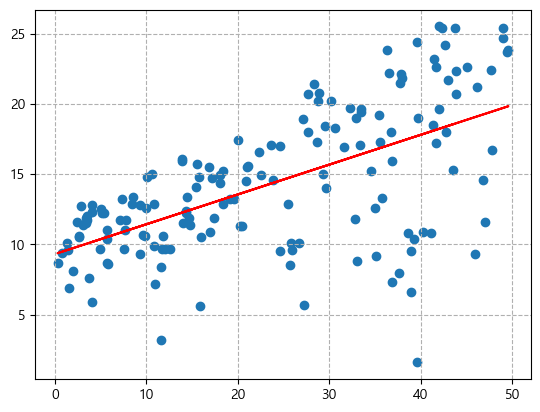

In [77]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.2121 * X_train + 9.3088, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [78]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.2121 * X_test + 9.3088

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

4.967797913893162


#### 라디오 광고 회귀 예측 결과
- 라디오 광고에 투자한 금액 * 0.2121 + 9.3088만큼 광고 수익이 창출될 것으로 예측
- 오차는 약 4.9677
- 데이터 중 loss가 큰 것이 많아서 오차가 크게 나타남

#### LinearRegressionModel 클래스 사용

In [89]:
from torch.nn import Module, Linear

# LinearRegressionModel 클래스 선언
class LinearRegressionModel(Module):
    # 클래스 실행 시
    def __init__(self):
        # 부모 클래스(torch.nn.Module) 실행
        super().__init__()
        # linear 재정의
        self.linear = Linear(1, 1)

    # LinearRegressionModel.forward 사용 시
    def forward(self, x):
        # 위에서 재정의한 linear에 전달받은 x값 넣어서 실행
        return self.linear(x)

In [80]:
# LinearRegressionModel 생성자 호출
l_r = LinearRegressionModel()
# 1e-10 = 0.0000000001 (소수점 10자리)
optimizer = SGD(l_r.parameters(), lr=1e-5)

epochs = 1000000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

 100/1000000: W: 0.3102, b: -0.0405, loss: 69.6083
 200/1000000: W: 0.4588, b: -0.0306, loss: 42.6327
 300/1000000: W: 0.4906, b: -0.0244, loss: 41.3560
 400/1000000: W: 0.4974, b: -0.0189, loss: 41.2705
 500/1000000: W: 0.4987, b: -0.0136, loss: 41.2403
 600/1000000: W: 0.4988, b: -0.0084, loss: 41.2126
 700/1000000: W: 0.4987, b: -0.0031, loss: 41.1851
 800/1000000: W: 0.4986, b: 0.0021, loss: 41.1576
 900/1000000: W: 0.4984, b: 0.0073, loss: 41.1301
1000/1000000: W: 0.4983, b: 0.0126, loss: 41.1027
1100/1000000: W: 0.4981, b: 0.0178, loss: 41.0753
1200/1000000: W: 0.4980, b: 0.0230, loss: 41.0479
1300/1000000: W: 0.4978, b: 0.0283, loss: 41.0206
1400/1000000: W: 0.4976, b: 0.0335, loss: 40.9932
1500/1000000: W: 0.4975, b: 0.0387, loss: 40.9660
1600/1000000: W: 0.4973, b: 0.0439, loss: 40.9387
1700/1000000: W: 0.4972, b: 0.0491, loss: 40.9115
1800/1000000: W: 0.4970, b: 0.0544, loss: 40.8843
1900/1000000: W: 0.4968, b: 0.0596, loss: 40.8572
2000/1000000: W: 0.4967, b: 0.0648, loss: 4

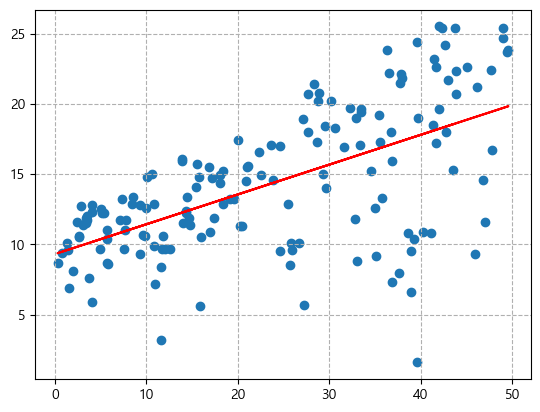

In [81]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.2121 * X_train + 9.3088, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [82]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.2121 * X_test + 9.3088

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

4.967797913893162


### 📰 신문

In [83]:
newspaper_cols = ['Newspaper', 'Sales']
nw_a_df = pre_a_df[newspaper_cols]

nw_a_df

Newspaper  Sales
0         69.2   22.1
1         45.1   10.4
2         69.3    9.3
3         58.5   18.5
4         58.4   12.9
..         ...    ...
195       13.8    7.6
196        8.1    9.7
197        6.4   12.8
198       66.2   25.5
199        8.7   13.4

[200 rows x 2 columns]

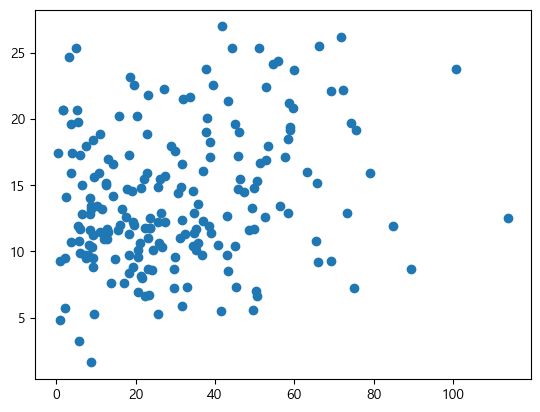

In [84]:
import matplotlib.pyplot as plt

# 신문 광고 투자와 판매량의 관계를 산점도로 시각화
plt.scatter(nw_a_df['Newspaper'], nw_a_df['Sales'])
plt.show()

array([[<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

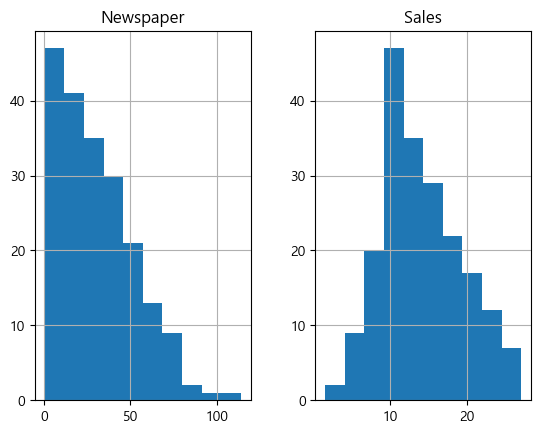

In [85]:
# 각 데이터의 분포를 히스토그램으로 시각화
nw_a_df.hist()

In [86]:
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# 시드 값 고정
torch.manual_seed(124)

# feature와 target으로 데이터 세트 분리
features, targets = nw_a_df.iloc[:, :-1], nw_a_df.iloc[:, -1]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 분석 이전, 분리한 데이터들의 value만 가져와 tensor 타입으로 재가공
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

# y(정답)의 경우, 마지막 컬럼 하나만 가져와서 현재 1차원 ndarray 형태
# reshape로 X(문제)와 같은 2차원(데이터 수 * 1열) tensor 타입으로 변환
y_train = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [87]:
# 데이터 재가공 확인
print('(x, y)')
for x, y in zip(X_train, y_train):
    print(x, y)

(x, y)
tensor([31.6000]) tensor([5.9000])
tensor([72.3000]) tensor([22.2000])
tensor([51.2000]) tensor([25.4000])
tensor([26.2000]) tensor([15.5000])
tensor([66.2000]) tensor([25.5000])
tensor([18.3000]) tensor([9.7000])
tensor([8.3000]) tensor([10.5000])
tensor([32.]) tensor([21.5000])
tensor([18.2000]) tensor([17.3000])
tensor([20.7000]) tensor([6.9000])
tensor([45.1000]) tensor([19.6000])
tensor([35.2000]) tensor([11.7000])
tensor([7.4000]) tensor([18.])
tensor([65.6000]) tensor([10.8000])
tensor([0.3000]) tensor([17.4000])
tensor([8.5000]) tensor([12.8000])
tensor([12.8000]) tensor([11.7000])
tensor([13.8000]) tensor([7.6000])
tensor([23.5000]) tensor([11.8000])
tensor([59.]) tensor([19.4000])
tensor([18.4000]) tensor([8.4000])
tensor([21.2000]) tensor([10.6000])
tensor([38.9000]) tensor([11.4000])
tensor([20.5000]) tensor([9.6000])
tensor([74.2000]) tensor([19.7000])
tensor([18.5000]) tensor([23.2000])
tensor([6.]) tensor([9.9000])
tensor([30.]) tensor([9.6000])
tensor([5.7000]) t

#### W, b, Loss Function을 직접 설정하는 경우

In [88]:
# 선형 회귀 모델 선언
l_r = Linear(1, 1)

# 가중치 초기화
W = torch.zeros(1, requires_grad=True)

# 편향 초기화
b = torch.zeros(1, requires_grad=True)

# 경사 하강법
optimizer = SGD([W, b], lr=1e-5)

# 반복 횟수 설정
epochs = 1000000

# 설정한 횟수만큼 반복
for epoch in range(1, epochs + 1):
    # 새로운 가설 수립
    H = W * X_train + b

    # 가설에 따른 loss 계산
    loss = mse_loss(H, y_train)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W.item(), b.item(), loss.item()))

 100/1000000: W: 0.3218, b: 0.0151, loss: 72.1879
 200/1000000: W: 0.3432, b: 0.0234, loss: 71.3772
 300/1000000: W: 0.3445, b: 0.0313, loss: 71.3127
 400/1000000: W: 0.3444, b: 0.0391, loss: 71.2516
 500/1000000: W: 0.3442, b: 0.0469, loss: 71.1906
 600/1000000: W: 0.3441, b: 0.0547, loss: 71.1296
 700/1000000: W: 0.3439, b: 0.0625, loss: 71.0688
 800/1000000: W: 0.3437, b: 0.0703, loss: 71.0080
 900/1000000: W: 0.3435, b: 0.0781, loss: 70.9473
1000/1000000: W: 0.3434, b: 0.0859, loss: 70.8867
1100/1000000: W: 0.3432, b: 0.0936, loss: 70.8261
1200/1000000: W: 0.3430, b: 0.1014, loss: 70.7656
1300/1000000: W: 0.3428, b: 0.1092, loss: 70.7052
1400/1000000: W: 0.3427, b: 0.1169, loss: 70.6449
1500/1000000: W: 0.3425, b: 0.1247, loss: 70.5847
1600/1000000: W: 0.3423, b: 0.1325, loss: 70.5245
1700/1000000: W: 0.3421, b: 0.1402, loss: 70.4644
1800/1000000: W: 0.3420, b: 0.1480, loss: 70.4044
1900/1000000: W: 0.3418, b: 0.1557, loss: 70.3445
2000/1000000: W: 0.3416, b: 0.1634, loss: 70.2847


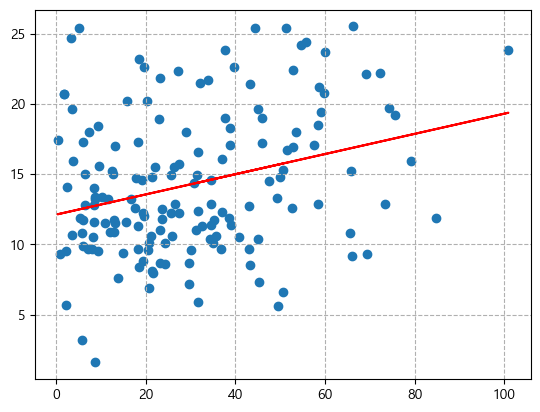

In [90]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.0718 * X_train + 12.1196, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [91]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.0718 * X_test + 12.1196

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

5.871051516606249


#### 라디오 광고 회귀 예측 결과
- 라디오 광고에 투자한 금액 * 0.0.0718 + 12.1196만큼 광고 수익이 창출될 것으로 예측
- 오차는 약 5.871
- 데이터 중 loss가 큰 것이 많아서 오차가 크게 나타남

#### LinearRegressionModel 클래스 사용

In [92]:
from torch.nn import Module, Linear

# LinearRegressionModel 클래스 선언
class LinearRegressionModel(Module):
    # 클래스 실행 시
    def __init__(self):
        # 부모 클래스(torch.nn.Module) 실행
        super().__init__()
        # linear 재정의
        self.linear = Linear(1, 1)

    # LinearRegressionModel.forward 사용 시
    def forward(self, x):
        # 위에서 재정의한 linear에 전달받은 x값 넣어서 실행
        return self.linear(x)

In [94]:
# LinearRegressionModel 생성자 호출
l_r = LinearRegressionModel()
# 1e-10 = 0.0000000001 (소수점 10자리)
optimizer = SGD(l_r.parameters(), lr=1e-5)

epochs = 1000000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()

    # 손실 함수 미분 후 기울기 계산
    loss.backward()

    # W, b 값 업데이트
    optimizer.step()

    # epoch 100번마다 출력
    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}' \
              .format(epoch, epochs, W, b, loss.item()))

 100/1000000: W: 0.3393, b: -0.7384, loss: 78.2388
 200/1000000: W: 0.3602, b: -0.7296, loss: 77.4525
 300/1000000: W: 0.3615, b: -0.7213, loss: 77.3803
 400/1000000: W: 0.3614, b: -0.7130, loss: 77.3114
 500/1000000: W: 0.3612, b: -0.7047, loss: 77.2426
 600/1000000: W: 0.3610, b: -0.6964, loss: 77.1739
 700/1000000: W: 0.3608, b: -0.6881, loss: 77.1053
 800/1000000: W: 0.3606, b: -0.6798, loss: 77.0368
 900/1000000: W: 0.3604, b: -0.6716, loss: 76.9683
1000/1000000: W: 0.3603, b: -0.6633, loss: 76.8999
1100/1000000: W: 0.3601, b: -0.6550, loss: 76.8317
1200/1000000: W: 0.3599, b: -0.6468, loss: 76.7635
1300/1000000: W: 0.3597, b: -0.6385, loss: 76.6954
1400/1000000: W: 0.3595, b: -0.6303, loss: 76.6274
1500/1000000: W: 0.3593, b: -0.6221, loss: 76.5595
1600/1000000: W: 0.3591, b: -0.6138, loss: 76.4916
1700/1000000: W: 0.3590, b: -0.6056, loss: 76.4239
1800/1000000: W: 0.3588, b: -0.5974, loss: 76.3562
1900/1000000: W: 0.3586, b: -0.5892, loss: 76.2887
2000/1000000: W: 0.3584, b: -0.

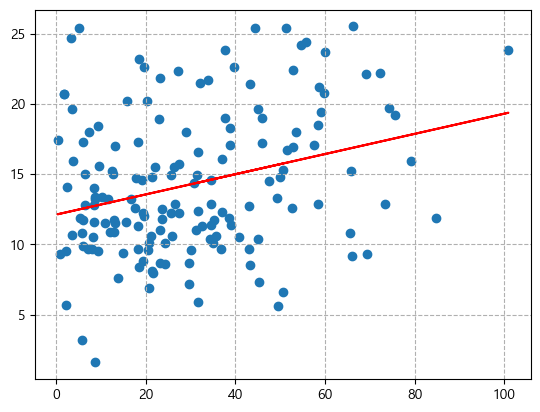

In [95]:
# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 문제와 정답의 관계를 산점도로 시각화
plt.scatter(X_train, y_train)

# 위 반복에서 얻은, loss가 최소값이 되는 가설을 선 그래프로 시각화
plt.plot(X_train, 0.0718 * X_train + 12.1196, color='red')

# 플롯에 그리드 표시
plt.grid(visible=True, linestyle='--')

# 플롯 표시
plt.show()

In [96]:
import numpy as np

# 위의 선 그래프와 같은 가설 수립
H = 0.0718 * X_test + 12.1196

# RMSE (Root MSE)
print(np.sqrt(mse_loss(H, y_test).item()))

5.871051516606249
